In [10]:
import ast
import json
import random
import unittest

import networkx as nx
from matplotlib import pyplot as plt
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import GroverOperator, MCMT, ZGate, MCXGate
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit_aer import AerSimulator, Aer

from src.algorithms.QAOA.QAOA import convert_qubo_to_ising, qaoa_optimize, qaoa_no_optimization, sample_results
from src.algorithms.VQE.VQE import vqe_optimization
from src.graph import Graph
from src.algorithms.grover import grover
from src.parser.parser import Parser, CodeVisitor, PROBLEMS
from src.problems.Three_SAT import ThreeSat
from src.problems.clique import Clique
from src.problems.factorization import Factor
from src.problems.max_cut import MaxCut
from src.problems.maximal_independent_set import MIS
from src.problems.tsp import TSP
from src.recommender.recommender_engine import recommender, plot_results
from src.reduction import *
from src.sat_to_qubo import *
from src.circuits_library import *
import csv
import ast

In [11]:
parser = Parser(model_path="../parser/saved_models")

file_path = '../parser/data.csv'
first_column = []

# 读取 CSV 文件第一列
with open(file_path, 'r', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        if row:
            first_column.append(row[0])

num = 0  # 统计 'Unknown' 类型的个数
mis_code = ""
# 遍历每条记录
for item in first_column:
    try:
        # 尝试将字符串中的 \n 等还原成真实代码
        try:
            clean_code = ast.literal_eval(item)
        except Exception:
            clean_code = item.encode().decode('unicode_escape')

        # 使用 parser 解析 clean_code
        problem_type, data = parser.parse(clean_code)

        # 打印结果
        print("→", problem_type, data)

        # 统计 Unknown 类型
        if problem_type == 'Unknown':
            num += 1
        if problem_type == "MIS":
            mis_code = clean_code

    except Exception as e:
        print("解析失败:", clean_code[:60].replace('\n', ' ') + "...")
        print("错误信息:", e)

# 打印 Unknown 的总数量
print("Number of Unknown problems:", num)

→ SUB [16, 16]
→ MaxCut <src.graph.Graph object at 0x2df27a3f0>
→ MaxCut <src.graph.Graph object at 0x2a93ee000>
→ MaxCut <src.graph.Graph object at 0x2e0a727e0>
→ MaxCut <src.graph.Graph object at 0x2df152000>
→ MaxCut <src.graph.Graph object at 0x2aff8fec0>
→ MaxCut <src.graph.Graph object at 0x174ff5220>
→ MaxCut <src.graph.Graph object at 0x2e1009eb0>
→ MaxCut <src.graph.Graph object at 0x2df209bb0>
→ MaxCut <src.graph.Graph object at 0x2b8a82b70>
→ MaxCut <src.graph.Graph object at 0x2b8a83440>
→ MaxCut <src.graph.Graph object at 0x2b8a82c90>
→ MaxCut <src.graph.Graph object at 0x2b8a830e0>
→ MIS <src.graph.Graph object at 0x2b8a831d0>
→ MIS <src.graph.Graph object at 0x2b8a831a0>
→ MIS <src.graph.Graph object at 0x2b8a838f0>
→ MIS <src.graph.Graph object at 0x2b8a83bf0>
→ MIS <src.graph.Graph object at 0x2b8a82a80>
→ MIS <src.graph.Graph object at 0x2b8a83020>
→ MIS <src.graph.Graph object at 0x2b8a83d10>
→ MIS <src.graph.Graph object at 0x2b8a831a0>
→ MIS <src.graph.Graph object

def do_something(n, edges):
    independent_set = set()
    for node in range(n):
        if all(neighbor not in independent_set for u, v in edges if u == node for neighbor in [v]):
            independent_set.add(node)
    return independent_set

# Input data
edges = [(0, 1), (1, 2), (2, 3)]
result = do_something(4, edges)
print(result)
MIS <src.graph.Graph object at 0x2df2ed280>
Starting MIS report generation with LaTeX formatting...


/Users/mac/path/to/venv/lib/python3.12/site-packages/qiskit/visualization/circuit/matplotlib.py:269: UserWarning: Style JSON file 'mpl.json' not found in any of these locations: /Users/mac/path/to/venv/lib/python3.12/site-packages/qiskit/visualization/circuit/styles/mpl.json, ~/mpl.json, ~/.qiskit/mpl.json, mpl.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)
/Users/mac/path/to/venv/lib/python3.12/site-packages/qiskit/visualization/circuit/matplotlib.py:269: UserWarning: Style JSON file 'mpl.json' not found in any of these locations: /Users/mac/path/to/venv/lib/python3.12/site-packages/qiskit/visualization/circuit/styles/mpl.json, ~/mpl.json, ~/.qiskit/mpl.json, mpl.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)
/Users/mac/path/to/venv/lib/python3.12/site-packages/qiskit/visualization/circuit/matplotlib.py:269: UserWarning: Style JSON file 'mpl.json' not found in any of these locations: /Users/mac/path/to/venv/

{'1011': 35200, '1010': 35232, '1111': 35319, '1101': 35057, '0001': 27359, '0011': 35208, '0111': 34853, '1000': 34936, '1110': 34811, '0110': 35531, '1100': 19636, '0100': 27445, '0010': 19448, '0000': 35261, '0101': 35118, '1001': 19586}


/Users/mac/path/to/venv/lib/python3.12/site-packages/qiskit/visualization/circuit/matplotlib.py:269: UserWarning: Style JSON file 'mpl.json' not found in any of these locations: /Users/mac/path/to/venv/lib/python3.12/site-packages/qiskit/visualization/circuit/styles/mpl.json, ~/mpl.json, ~/.qiskit/mpl.json, mpl.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


[DEBUG] ibm_kyiv: N1=296, N2=35, Nm=4, E1=0.00028, E2=0.012, Em=0.007, E=0.4135
[DEBUG] ibm_sherbrooke: N1=290, N2=35, Nm=4, E1=0.00022, E2=0.0078, Em=0.013, E=0.3231
[DEBUG] ibm_brisbane: N1=296, N2=35, Nm=4, E1=0.00025, E2=0.0077, Em=0.013, E=0.3276
[DEBUG] IonQ Aria (Amazon): N1=207, N2=24, Nm=4, E1=0.00019999999999997797, E2=0.012700000000000045, Em=0.005199999999999982, E=0.3086
[DEBUG] IQM Garnet: N1=160, N2=36, Nm=4, E1=0.001910925533206881, E2=0.031858486626401554, Em=0.033687499999999995, E=0.7998
[DEBUG] Rigetti Ankaa-2: N1=147, N2=36, Nm=4, E1=0.001931, E2=0.11794, Em=0.06565, E=0.9937
[DEBUG] IonQ Aria (Azure): N1=207, N2=24, Nm=4, E1=0.00019999999999997797, E2=0.012700000000000045, Em=0.005199999999999982, E=0.3086
[DEBUG] Quantinuum H1: N1=188, N2=24, Nm=4, E1=2e-05, E2=0.001, Em=0.003, E=0.0390
[DEBUG] Quantinuum H2: N1=188, N2=24, Nm=4, E1=3e-05, E2=0.0015, Em=0.0015, E=0.0466
[DEBUG] Rigetti Ankaa-9Q-3: N1=146, N2=36, Nm=4, E1=0.001, E2=0.008, Em=0.019, E=0.4007
PDF re

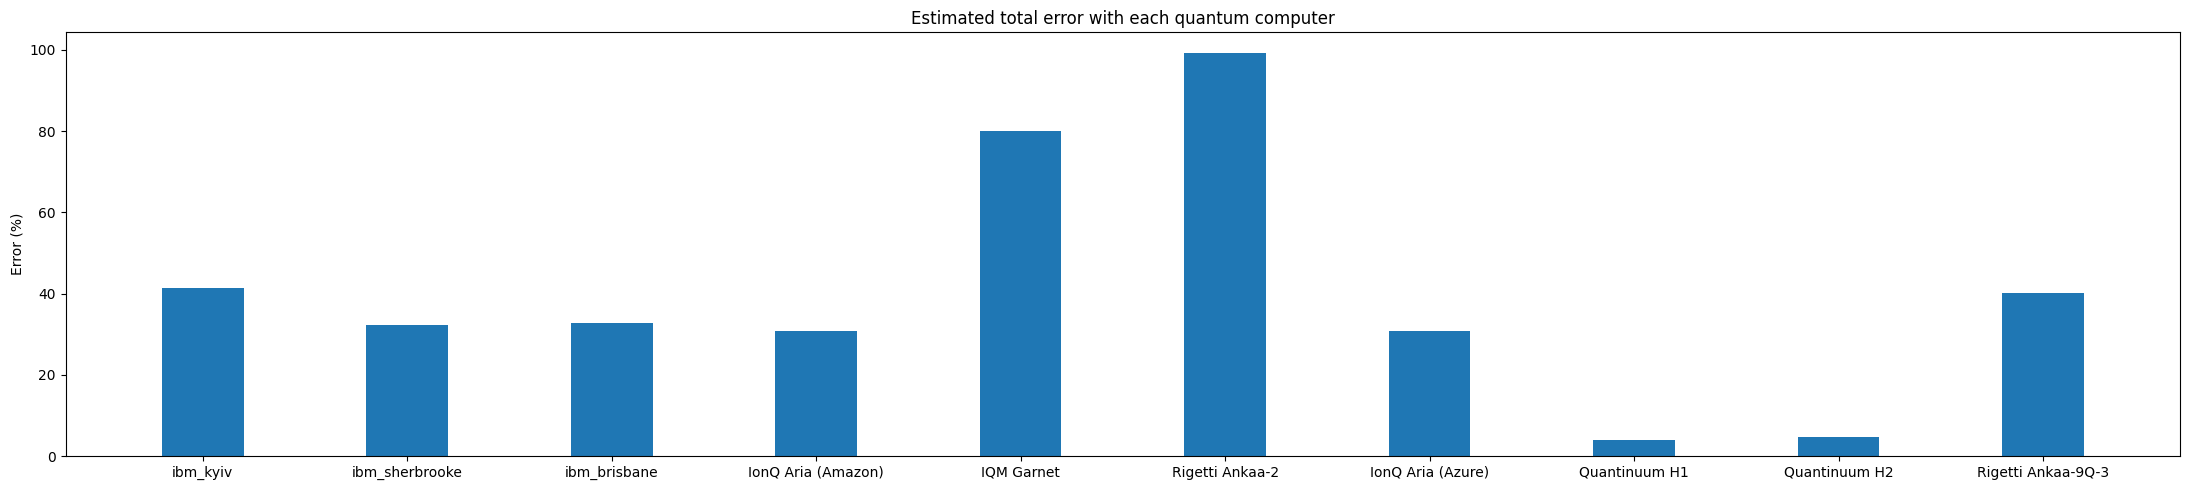

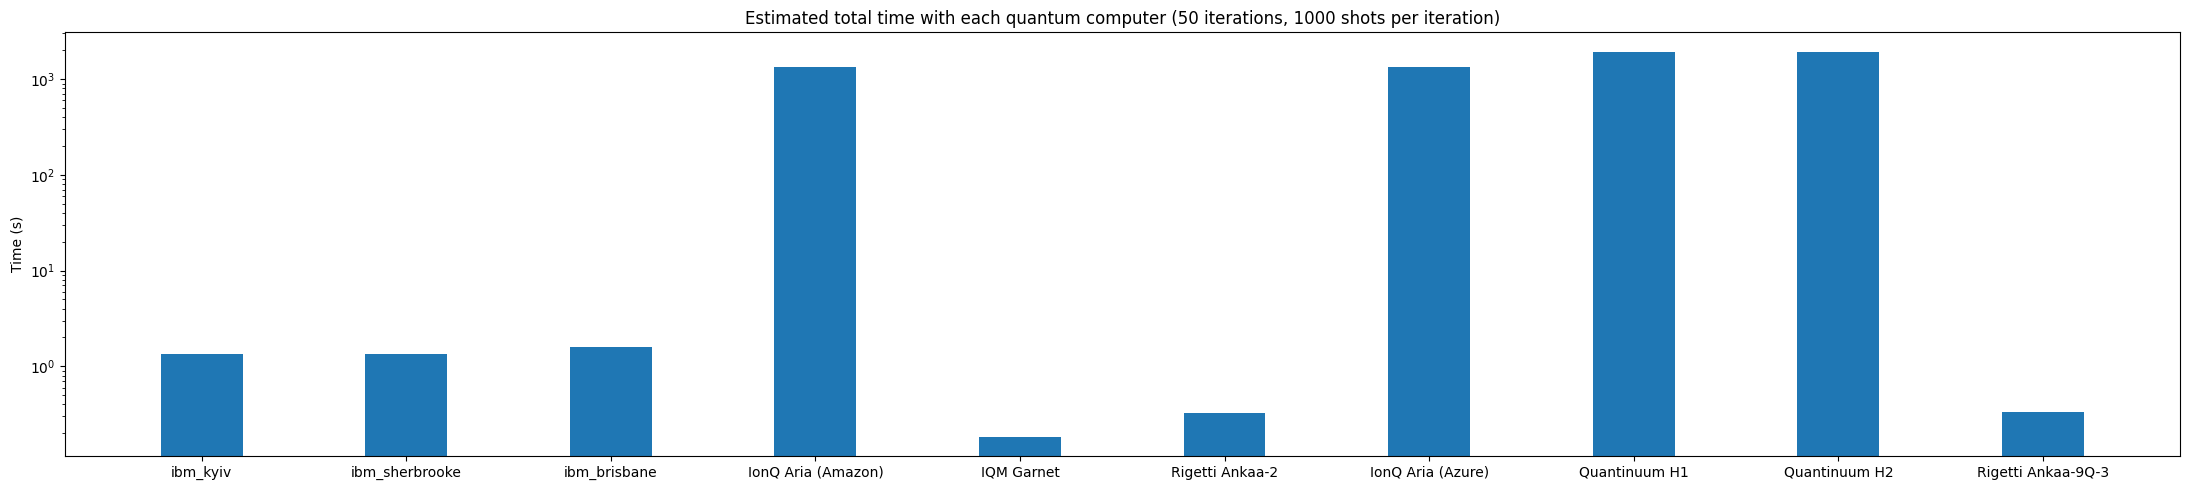

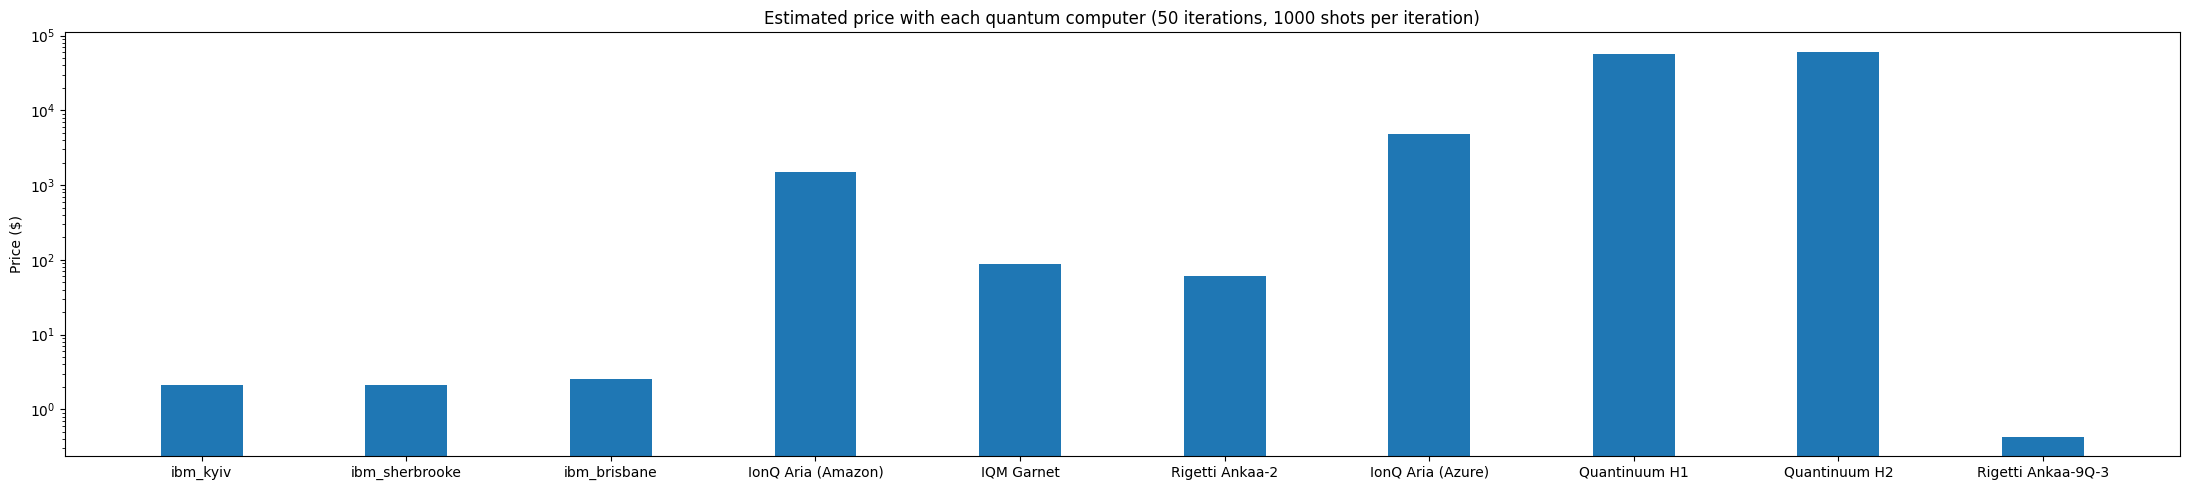

In [12]:
from matplotlib import pyplot as plt
print(mis_code)
is_snippet = "def independent_nodes(n, edges):\n    independent_set = set()\n    for node in range(n):\n        if all(neighbor not in independent_set for u, v in edges if u == node for neighbor in [v]):\n            independent_set.add(node)\n    return independent_set\n\n# Input json\nedges = [(0, 1), (0, 2), (1, 2), (1, 3)]\nindependent_set = independent_nodes(2, edges)\nprint(independent_set)"

tag, data = parser.parse(is_snippet)
print(tag, data)
mis = PROBLEMS[tag](data.G)  
mis.report_latex()

In [1]:
import os
from qiskit_ibm_runtime import QiskitRuntimeService

# 1) Authenticate (env var preferred)
service = QiskitRuntimeService(
    channel="ibm_quantum",  # or "ibm_cloud" if using IBM Cloud
    token=os.getenv("IBM_QUANTUM_TOKEN")
)

# 2) Get the Brisbane backend
brisbane = service.backend("ibm_brisbane")

RequestsApiError: 'HTTPSConnectionPool(host=\'auth.quantum-computing.ibm.com\', port=443): Max retries exceeded with url: /api/version (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x12d4196d0>: Failed to resolve \'auth.quantum-computing.ibm.com\' ([Errno 8] nodename nor servname provided, or not known)"))'